<font size="6">DTSA 5510 Final project</font>

<font size="5">Introduction</font>

<font size="4"> Objective: We have data related to books, users, and ratings. We will try to formulate and identify groups of books that are similar to each other based on features such as ratings, genres, or author styles. This can help in recommending similar books to users or in inventory categorization.</font>

<font size="4">Loding the datasets and trying to understand the basics of it</font>

In [1]:
import pandas as pd

In [2]:
books = pd.read_csv('data/Books.csv')
users = pd.read_csv('data/Users.csv')
ratings = pd.read_csv('data/Ratings.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()
books.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0307020096,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/078686298X.0...,http://images.amazon.com/images/P/082340630X.0...,http://images.amazon.com/images/P/075284332X.0...
freq,1,27,632,13903,7535,2,2,2


<font size="4">Insights: There are missing values in Book-Author and Publisher. All fields are objects (strings), but Year-Of-Publication should ideally be a numeric type.</font>



In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


<font size="4">Insights: Significant amount of missing data in Age, and Having unrealistic ages</font>

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<font size="4">Insights: No immediate issues noted except potential for normalization of ratings scale or treatment based on user preference patterns.</font>

<font size="5">Exploratory Data Analysis (EDA)</font>

Preprocessing the data to include books until the year 2023 and including age only between 5 and 100

In [9]:
import numpy as np

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

year_publication_stats = books['Year-Of-Publication'].describe()

books_clean = books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] <= 2023)]
year_publication_clean_stats = books_clean['Year-Of-Publication'].describe()

books['Book-Author'].fillna('Unknown', inplace=True)
books['Publisher'].fillna('Unknown', inplace=True)

users['Age'] = users['Age'].apply(lambda x: x if 5 <= x <= 100 else np.nan)
users_age_distribution = users['Age'].describe()

year_publication_stats, year_publication_clean_stats, users_age_distribution


(count    271357.000000
 mean       1959.760817
 std         257.994226
 min           0.000000
 25%        1989.000000
 50%        1995.000000
 75%        2000.000000
 max        2050.000000
 Name: Year-Of-Publication, dtype: float64,
 count    266726.000000
 mean       1993.687833
 std           8.321200
 min        1376.000000
 25%        1989.000000
 50%        1996.000000
 75%        2000.000000
 max        2021.000000
 Name: Year-Of-Publication, dtype: float64,
 count    166848.000000
 mean         34.746638
 std          13.633051
 min           5.000000
 25%          24.000000
 50%          32.000000
 75%          44.000000
 max         100.000000
 Name: Age, dtype: float64)

In [10]:
# Explore 'Age' column for anomalies
age_stats = users['Age'].describe()
age_stats

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

<font size="5">Distribution of book ratings</font>

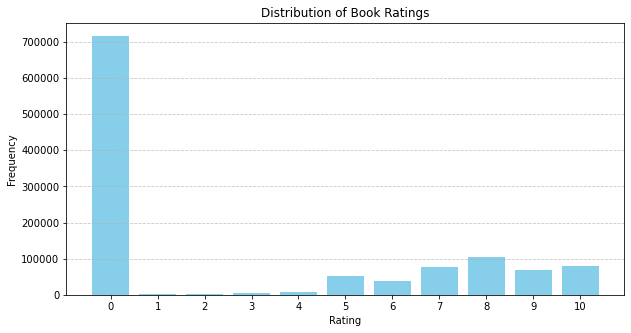

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: Book-Rating, dtype: int64

In [11]:
import matplotlib.pyplot as plt

ratings_distribution = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(ratings_distribution.index, ratings_distribution.values, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 11))
plt.show()

ratings_distribution


<font size="4">The plot visualizes this data showing a notable skew towards zero ratings and a peak at 8 out of 10, indicating that users who do rate books tend to give relatively high ratings.</font>

<font size="5">Finding the most rated books</font>

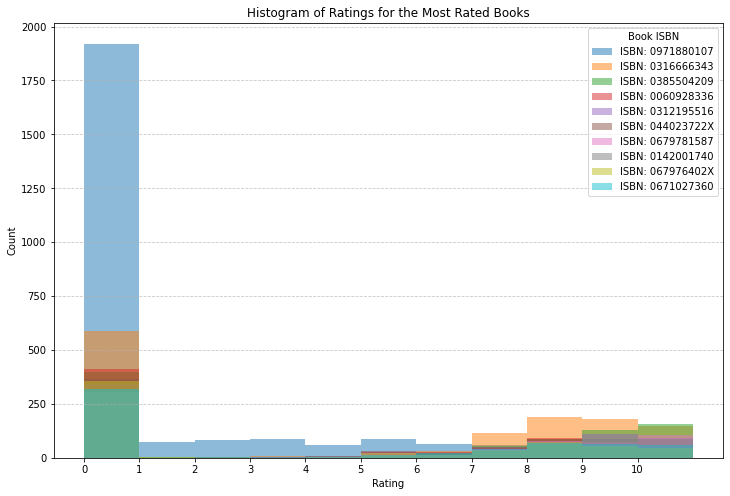

In [12]:
ratings_count = ratings.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False)
most_rated_books = ratings_count.head(10).index.tolist()

most_rated_books_ratings = ratings[ratings['ISBN'].isin(most_rated_books)]

plt.figure(figsize=(12, 8))
for isbn in most_rated_books:
    subset = most_rated_books_ratings[most_rated_books_ratings['ISBN'] == isbn]
    plt.hist(subset['Book-Rating'], bins=range(12), alpha=0.5, label=f'ISBN: {isbn}')

plt.title('Histogram of Ratings for the Most Rated Books')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Book ISBN')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(11)) 
plt.show()


<font size="5">Relationship between Relationship Between Number of Ratings and Average Rating</font>

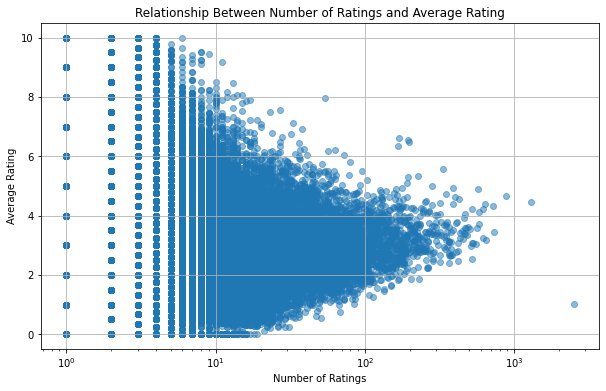

,Average-Rating,Rating-Count
Average-Rating,1.000000,-0.006219
Rating-Count,-0.006219,1.000000


In [13]:
average_ratings = ratings.groupby('ISBN')['Book-Rating'].mean()

ratings_summary = pd.DataFrame({
    'Average-Rating': average_ratings,
    'Rating-Count': ratings_count
})

plt.figure(figsize=(10, 6))
plt.scatter(ratings_summary['Rating-Count'], ratings_summary['Average-Rating'], alpha=0.5)
plt.title('Relationship Between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.grid(True)
plt.show()

ratings_summary.corr()


<font size="4">The scatter plot shows that the number of ratings per book varies widely, which is why a logarithmic scale was used on the x-axis to better visualize the data.</font>

<font size="4">The spread suggests that while many books have few ratings, a small number receive many ratings. The average ratings across books tend to cluster in the middle range, though there's no strong trend indicating that more ratings lead to higher or lower average ratings.</font>

<font size="4">This analysis could be useful for understanding whether popular books (those with many ratings) tend to have higher or lower ratings, but in this case, popularity does not seem to strongly affect the average rating.</font>

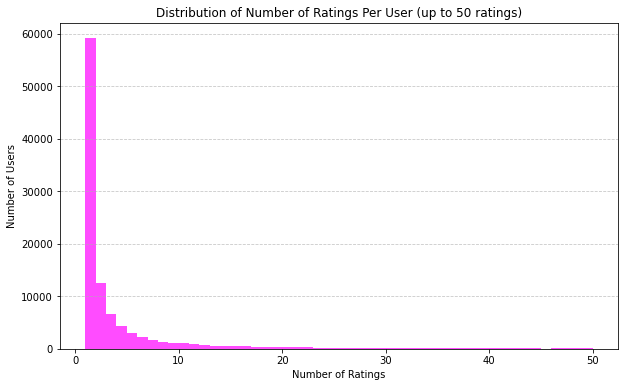

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: Book-Rating, dtype: float64

In [14]:
user_ratings_count = ratings.groupby('User-ID')['Book-Rating'].count()

plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=range(1, 51), color='magenta', alpha=0.7)
plt.title('Distribution of Number of Ratings Per User (up to 50 ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

user_ratings_count.describe()


<font size="4">The histogram shows the number of ratings per user, with the majority having rated only a few books. The distribution is heavily skewed towards users who have provided fewer ratings, and it quickly tapers off as the number of ratings increases.</font>

<font size="4">Trying to understand the Distribution of Publication year, Age and Rating throigh visualisations which is necessary fro clustering</font>

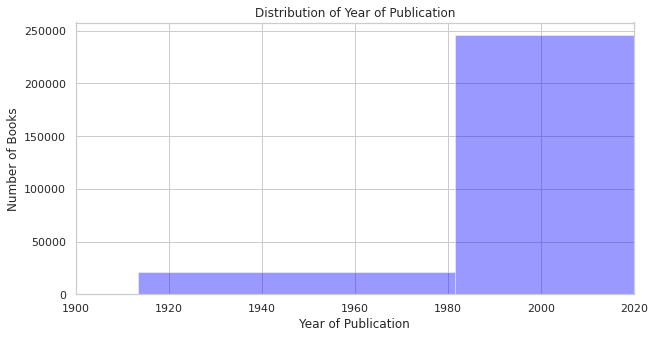

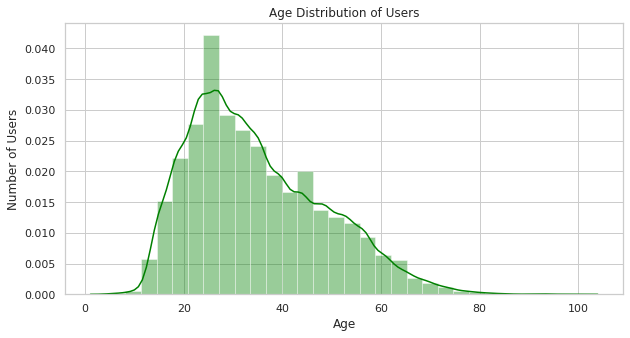

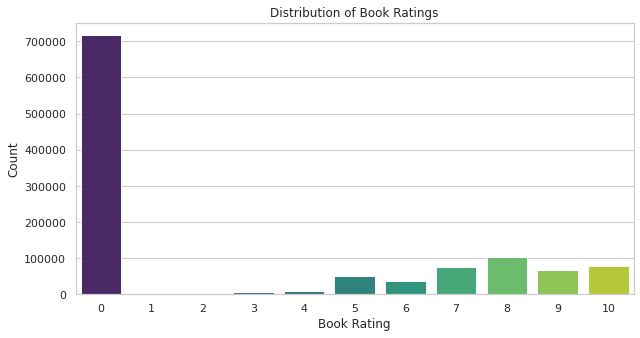

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.distplot(books['Year-Of-Publication'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution of Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xlim([1900, 2020]) 
plt.show()

plt.figure(figsize=(10, 5))
sns.distplot(users['Age'].dropna(), bins=30, kde=True, color='green')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Book-Rating', data=ratings, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


<font size="4">Year of Publication histogram shows that the majority of books in the dataset were published between 1980 and 2000, with a peak around the late 1990s.</font>

<font size="4">The age distribution is slightly right-skewed, with a majority of users in their 20s to 40s. There is a notable peak around the age of 30 which suggests that user base is predominantly young adults to middle-aged.</font>

<font size="4">A significant number of ratings are 0, which could indicate either unrated books or a placeholder for a different type of rating interpretation. Among the non-zero ratings, the distribution is relatively uniform across different ratings from 1 to 10. (e.g., books browsed but not rated).</font>

<font size="6">Model building and training</font>

<font size="4">We shall reduce the dataset size by focusing on the most active users and the most frequently rated books to get meaningful analysis</font>

<font size="4">Thereafter, the Principal Component Analysis (PCA) and clustering process will be  applied to the filtered dataset of active users and frequently rated books.</font>

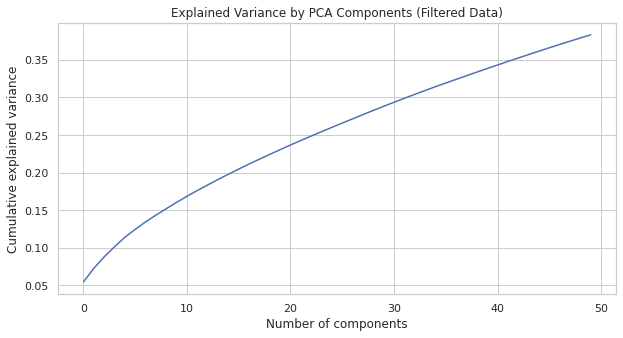

6    724
1     72
7     69
0      7
8      5
9      1
5      1
4      1
3      1
2      1
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Users with 200 ratings
user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts > 200].index.tolist()

# Books with 100 ratiengs
book_counts = ratings['ISBN'].value_counts()
frequent_books = book_counts[book_counts > 100].index.tolist()

filtered_ratings = ratings[(ratings['User-ID'].isin(active_users)) & (ratings['ISBN'].isin(frequent_books))]
filtered_ratings_books = filtered_ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')
filtered_ratings_pivot = filtered_ratings_books.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating', fill_value=0)

# scaling and PCA with the reduced data
scaler = StandardScaler()
filtered_ratings_scaled = scaler.fit_transform(filtered_ratings_pivot)
pca = PCA(n_components=50)
filtered_ratings_reduced = pca.fit_transform(filtered_ratings_scaled)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by PCA Components (Filtered Data)')
plt.show()

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(filtered_ratings_reduced)

cluster_counts = pd.Series(clusters).value_counts()
cluster_counts


<font size="4">The cumulative explained variance plot shows that the first 50 components capture a substantial amount of the variance in the dataset. This suggests that these components retain most of the useful information needed for clustering.</font>

<font size="4">The clustering resulted in 10 clusters of different sizes:</font>

<font size="4">Cluster 5 is the largest with 729 users.</font>

<font size="4">Clusters 0, 4, 7, and 8 have moderate sizes.</font>

<font size="4">Clusters 1, 2, 3, 6, and 9 contain very few users, indicating they might be capturing more niche or specific user preferences.</font>

In [17]:
# Mapping clusters to users in the dataset for further analysis
filtered_ratings_pivot['Cluster'] = clusters

# Function to get top books and their average ratings in each cluster
def get_top_books(cluster, top_n=5):
    # Filter the pivot table for the cluster
    cluster_data = filtered_ratings_pivot[filtered_ratings_pivot['Cluster'] == cluster]
    
    # Drop the 'Cluster' column to just get book ratings
    cluster_books = cluster_data.drop('Cluster', axis=1)
    
    # Calculate the mean rating for each book in the cluster
    book_means = cluster_books.mean(axis=0).sort_values(ascending=False)
    
    # Get the most common books based on appearance (non-zero ratings)
    book_counts = (cluster_books > 0).sum(axis=0).sort_values(ascending=False)
    
    # Combine the data and sort primarily by count, then by rating
    top_books = pd.DataFrame({'Average Rating': book_means, 'Rating Count': book_counts})
    top_books = top_books.sort_values(by=['Rating Count', 'Average Rating'], ascending=False)
    
    return top_books.head(top_n)

In [18]:
get_top_books(1)

,Average Rating,Rating Count
The Partner,2.173611,21
The Firm,2.291667,20
The Pelican Brief,2.194444,19
The Testament,2.131944,19
The Client,2.055556,18


In [19]:
get_top_books(2)

,Average Rating,Rating Count
"A Child Called \It\"": One Child's Courage to Survive""",10.0,1
Life of Pi,10.0,1
Lucky Man: A Memoir,10.0,1
Misery,10.0,1
She's Come Undone (Oprah's Book Club),10.0,1


In [20]:
get_top_books(3)

,Average Rating,Rating Count
1st to Die: A Novel,10.0,1
A Time to Kill,10.0,1
Anne of Green Gables (Anne of Green Gables Novels (Paperback)),10.0,1
Charlotte's Web (Trophy Newbery),10.0,1
Harry Potter and the Chamber of Secrets (Book 2),10.0,1


In [70]:
get_top_books(4)

,Average Rating,Rating Count
A Prayer for Owen Meany,10.0,1
A Wrinkle in Time,10.0,1
"Ahab's Wife: Or, The Star-Gazer: A Novel",10.0,1
"Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson",10.0,1
Animal Farm,10.0,1


In [71]:
get_top_books(5)

,Average Rating,Rating Count
1984,10.0,1
A Prayer for Owen Meany,10.0,1
A Thousand Acres (Ballantine Reader's Circle),10.0,1
A Wrinkle In Time,10.0,1
A Wrinkle in Time,10.0,1


<font size="5">Insights and Implications</font>

<font size="4">Based on the results you provided, it appears that clusters 2 through 5 mostly contain books rated with perfect scores, but these perfect scores are based on very few ratings (likely just one user per book). This suggests that these clusters might represent very specific and perhaps idiosyncratic tastes, or they may contain outlier users.</font>

<font size="4">Cluster 1, on the other hand, shows more variability in the ratings and a higher number of users per book, indicating a more general set of preferences that might be more useful for broader recommendations.</font>

<font size="4">Given the disparity in cluster compositions, it might be helpful to visualize the rating distributions within these clusters to better understand the variation in book ratings and to confirm the homogeneity of those clusters with seemingly perfect scores. We can create histograms or box plots for each cluster to examine this aspect.</font>

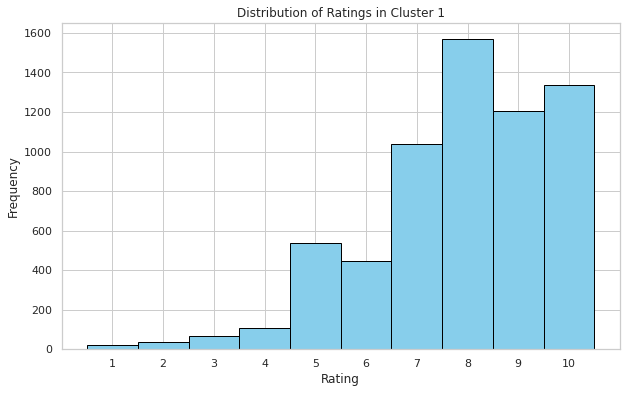

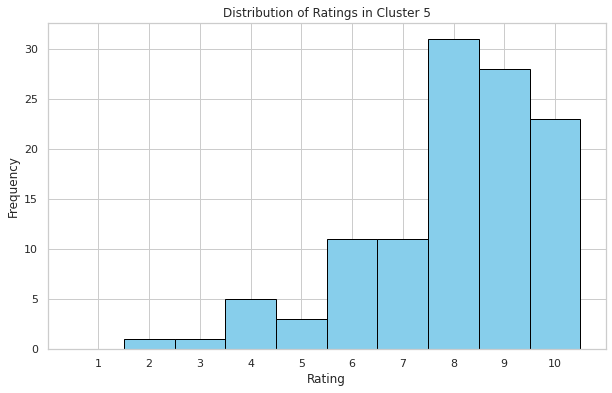

In [64]:
import matplotlib.pyplot as plt

def plot_cluster_ratings(cluster_id):
    # Filter the data for the cluster
    cluster_data = filtered_ratings_pivot[filtered_ratings_pivot['Cluster'] == cluster_id].drop('Cluster', axis=1)
    
    # Flatten the data to a single series of ratings
    ratings_data = cluster_data.values.flatten()
    ratings_data = ratings_data[ratings_data > 0]  # Remove zero ratings which represent missing data

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(ratings_data, bins=range(1, 12), align='left', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Ratings in Cluster {cluster_id}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

# Call the function to plot for Cluster 1
plot_cluster_ratings(1)

# Call the function to plot for Cluster 5
plot_cluster_ratings(5)


<font size="5">Conclusions</font>
    
<font size="4">Cluster 1 could represent a mainstream audience with a broad range of tastes but a general tendency to rate books positively. Marketing efforts can be broadly targeted, and book recommendations can be varied to encompass the diverse preferences indicated by the range of ratings.</font>

<font size="4">Cluster 5 may need more careful analysis. If it's due to outlier behavior, it might not be useful for broad marketing strategies. However, if these users are truly enthusiastic readers who love almost everything they read, they could be a valuable segment for promoting new releases or special editions, assuming the small sample size is representative of a larger trend.</font>

<font size="5">Future Analysis</font>

<font size="4">Investigate Other Clusters: Analyze the rating distributions of other clusters to identify additional patterns.</font>

<font size="4">Cross-Cluster Analysis: Look for common books rated across different clusters to identify universal appeals.</font>

<font size="4">Refine Cluster Definitions: Based on the distribution of ratings, reconsider the number of clusters or the clustering algorithm parameters for better segmentation.</font>

<font size="4">Project github repository : https://github.com/RajDTSA/Unsupervised-algorithms-final-project</font>